In [2]:
def show(img):
    cv2.imshow("Input",img)
    cv2.waitKey(0); 
    cv2.destroyAllWindows()

In [ ]:
#converting BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show(hsv)

In [5]:
#for understanding the image pixel format
print(len(img))
print(len(img[0]))
print(len(img[0][0]))
#print(len(img[0][0][0]))

588
1063
3


In [6]:
# calculating Smax and Smin 
Smax=0
Smin=0
for row in hsv:
    for pixel in row:
        if Smax<pixel[1]:
            Smax=pixel[1]
            
        if Smin>pixel[1]:
            Smin=pixel[1]
            
            
            
        
    

In [7]:
# calculating Hmax and Hmin 
Hmax=0
Hmin=0
for row in hsv:
    for pixel in row:
        if Hmax<pixel[0]:
            Hmax=pixel[0]
            
        if Hmin>pixel[0]:
            Hmin=pixel[0]
            
            
      

In [8]:
#for HSV IMAGE 


#blurring to remove high frequency component
imgBlurred = cv2.GaussianBlur(hsv, (5,5), 0)
show(imgBlurred)

#color to greyscale image
gray = cv2.cvtColor(imgBlurred, cv2.COLOR_BGR2GRAY)
show(gray)

#sobel edge detection 
sobelx = cv2.Sobel(gray,cv2.CV_8U,1,0,ksize=3)
show(sobelx)



In [15]:
#for color IMAGE


#blurring to remove high frequency component
imgBlurred = cv2.GaussianBlur(img, (5,5), 0)
show(imgBlurred)

#color to greyscale image
gray = cv2.cvtColor(imgBlurred, cv2.COLOR_BGR2GRAY)
show(gray)

#sobel edge detection 
sobelx = cv2.Sobel(gray,cv2.CV_8U,1,0,ksize=3)
show(sobelx)



In [17]:
#otsu thresolding
ret2,threshold_img = cv2.threshold(sobelx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show(threshold_img)


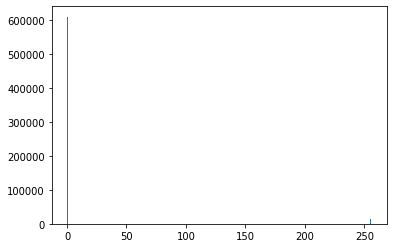

In [20]:
#biomodal image so better to use Otsu Thresolding
plt.hist(threshold_img.ravel(),256,[0,256]); plt.show()

In [21]:
#adaptive thresolding
th2 = cv2.adaptiveThreshold(sobelx,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
show(th2)
th3 = cv2.adaptiveThreshold(sobelx,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
show(th2)

In [22]:
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))


In [23]:
morph_img_threshold = threshold_img.copy()

In [24]:
cv2.morphologyEx(src=threshold_img, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
show(morph_img_threshold)

In [ ]:
contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)

119

In [41]:
cv2.drawContours(img, contours, -1, (255,255,255), 1)

array([[[245, 244, 242],
        [245, 244, 242],
        [245, 244, 242],
        ...,
        [ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14]],

       [[245, 244, 242],
        [245, 244, 242],
        [245, 244, 242],
        ...,
        [ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14]],

       [[245, 244, 242],
        [245, 244, 242],
        [245, 244, 242],
        ...,
        [ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14]],

       ...,

       [[161, 162, 173],
        [160, 161, 171],
        [159, 161, 170],
        ...,
        [ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14]],

       [[162, 163, 174],
        [160, 161, 172],
        [159, 161, 171],
        ...,
        [ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14]],

       [[207, 207, 207],
        [207, 207, 207],
        [207, 207, 207],
        ...,
        [207, 207, 207],
        [207, 207, 207],
        [207, 207, 207]]

In [42]:
show(img)